In [1]:
import sys


In [2]:
#sys.path.append("/home/edixon1/GillesPy2/gillespy2")
sys.path.append("/Users/ghilman/Documents/Coding/repo/GillesPy2")

In [3]:
sys.path


['',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python36.zip',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload',
 '/Users/ghilman/Library/Python/3.6/lib/python/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages',
 '/Users/ghilman/Library/Python/3.6/lib/python/site-packages/IPython/extensions',
 '/Users/ghilman/.ipython',
 '/Users/ghilman/Documents/Coding/repo/GillesPy2']

In [4]:
%matplotlib
%matplotlib inline
import os
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.0001)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=10)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [6]:
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.tau_leaping_solver import TauLeapingSolver

In [7]:
model = MichaelisMenten()

In [8]:
ssaResults = model.run(solver=BasicSSASolver)
tauResults = model.run(solver=TauLeapingSolver)

#print(tauResults)

In [9]:
#import time
#%time time.sleep(3)

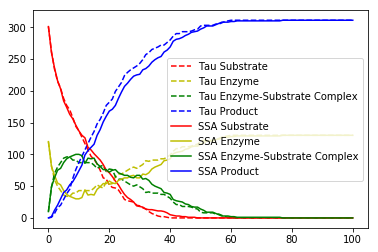

In [10]:
plt.plot(tauResults['time'],tauResults['A'],'--r', label='Tau Substrate')
plt.plot(tauResults['time'],tauResults['B'],'--y', label='Tau Enzyme')
plt.plot(tauResults['time'],tauResults['C'],'--g', label='Tau Enzyme-Substrate Complex')
plt.plot(tauResults['time'],tauResults['D'],'--b', label='Tau Product')
plt.plot(ssaResults['time'],ssaResults['A'],'-r', label='SSA Substrate')
plt.plot(ssaResults['time'],ssaResults['B'],'-y', label='SSA Enzyme')
plt.plot(ssaResults['time'],ssaResults['C'],'-g', label='SSA Enzyme-Substrate Complex')
plt.plot(ssaResults['time'],ssaResults['D'],'-b', label='SSA Product')
plt.plot([0],[11])
plt.legend(loc='best')